# Recurrent Neural network 

#part 1 data preprocessing 

import the lib

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import the training set

In [2]:
ds_train=pd.read_csv("Google_Stock_Price_Train.csv")
ds_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [3]:
set_train=ds_train.iloc[:, 1:2].values
set_train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# feature scaling 

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train_setscaler=sc.fit_transform(set_train)

In [5]:
train_setscaler.shape

(1258, 1)

# creating the data structure with 60 timestpes and 1output

In [6]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_setscaler[i-60:i,0])
    y_train.append(train_setscaler[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

# reshaping 

In [7]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

# part 2 buildling and raining the RNN
importing the keras lib packages

In [8]:
!pip install TensorFlow 
#pip install keras

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# initialsing the RNN 

In [10]:
regressor=Sequential()

# adding the 1st LSTM layer and some DROPOUT regulasation

In [11]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

# adding the 2nd  LSTM layer and some DROPOUT regulasation

In [12]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 3rd LSTM layer and some DROPOUT regulasation

In [13]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# adding the 4th LSTM layer and some DROPOUT regulasation

In [14]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

# adding the op layer

In [15]:
regressor.add(Dense(units=1))

# compling the rnn

In [16]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

# fitting theRNN to the training set

In [18]:
regressor.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
38/38 [==============================] - 26s 236ms/step - loss: 0.1201
Epoch 2/50
38/38 [==============================] - 9s 227ms/step - loss: 0.0860
Epoch 3/50
38/38 [==============================] - 7s 184ms/step - loss: 0.0822
Epoch 4/50
38/38 [==============================] - 8s 213ms/step - loss: 0.0801
Epoch 5/50
38/38 [==============================] - 7s 191ms/step - loss: 0.0800
Epoch 6/50
38/38 [==============================] - 7s 182ms/step - loss: 0.0790
Epoch 7/50
38/38 [==============================] - 7s 195ms/step - loss: 0.0784
Epoch 8/50
38/38 [==============================] - 9s 233ms/step - loss: 0.0785
Epoch 9/50
38/38 [==============================] - 8s 218ms/step - loss: 0.0773
Epoch 10/50
38/38 [==============================] - 9s 227ms/step - loss: 0.0778
Epoch 11/50
38/38 [==============================] - 9s 231ms/step - loss: 0.0780
Epoch 12/50
38/38 [==============================] - 9s 242ms/step - loss: 0.0772
Epoch 13/50
38/38 [=====

In [19]:
pred=regressor.predict(x_train)

38/38 [==============================] - 8s 74ms/step


# Evaliting the RNN

In [20]:
import math 
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_train,pred))
rmse

ValueError: Found array with dim 3. Estimator expected <= 2.

# part 3 making the prediction and visulsing the results

getting the real stok price of 2007

In [21]:
ds_test=pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price=ds_test.iloc[:,1:2].values

gettings the prediction stock price of 2017

In [22]:
ds_total=pd.concat((ds_train["Open"],ds_test["Open"]),axis=0)
inputs=ds_total[len(ds_total)-len(ds_test)-60:].values       #60 means 1st 60 rec leave 
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_xest,(x_xest.shape[0],x_xest.shape[1],1))
predict_stock_price=regressor.predict(x_test)
predict_stock_price=sc.inverse_transform(predict_stock_price)

NameError: name 'x_xest' is not defined

# visualising the result 

NameError: name 'predict_stock_price' is not defined

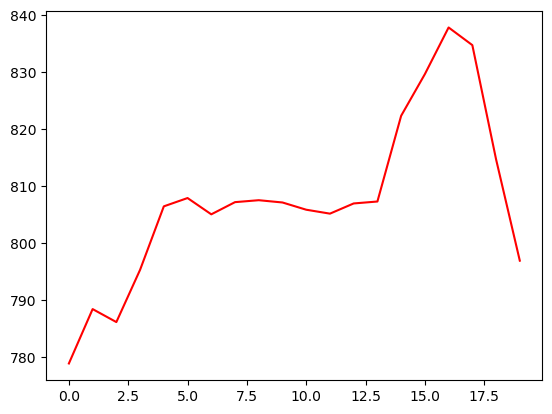

In [23]:
plt.plot(real_stock_price,color="red",label="real_stock_price")
plt.plot(predict_stock_price,color="bule",label="predict_stock_price")
plt.title("google stock preci prediction ")
plt.xlabel("time")
plt.ylabel("google stock price")
plt.legend()
plt.show()